In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database you built
conn = sqlite3.connect('fleet.db')

# Load the recovery actions
df = pd.read_sql_query("SELECT * FROM recovery_actions", conn)
print(f"Loaded {len(df)} processed records.")
df.head()

Loaded 4197 processed records.


,device_id,region,battery_voltage,signal_strength,update_status,recovery_action
0,DEV-5c560667,Europe,13.52,28,Partial,RETRY_UPDATE
1,DEV-1ead83b6,Middle East,13.36,43,Partial,RETRY_UPDATE
2,DEV-d07b89ea,Middle East,13.00,58,Partial,RETRY_UPDATE
3,DEV-5c209de8,North America,12.81,84,Partial,RETRY_UPDATE
4,DEV-790dcb54,India,12.90,21,Partial,RETRY_UPDATE


C:\Users\dhanu\AppData\Local\Temp\ipykernel_16404\919432159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='recovery_action', palette='viridis')


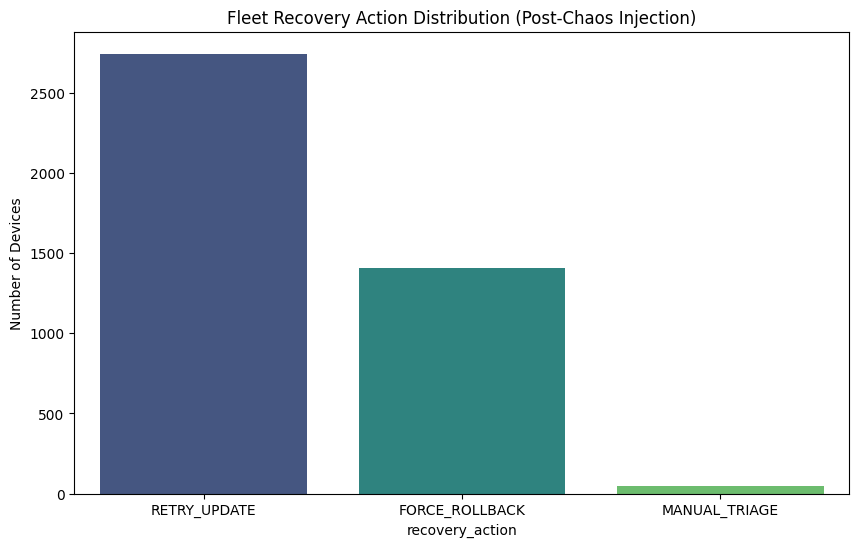

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='recovery_action', palette='viridis')
plt.title('Fleet Recovery Action Distribution (Post-Chaos Injection)')
plt.ylabel('Number of Devices')
plt.show()

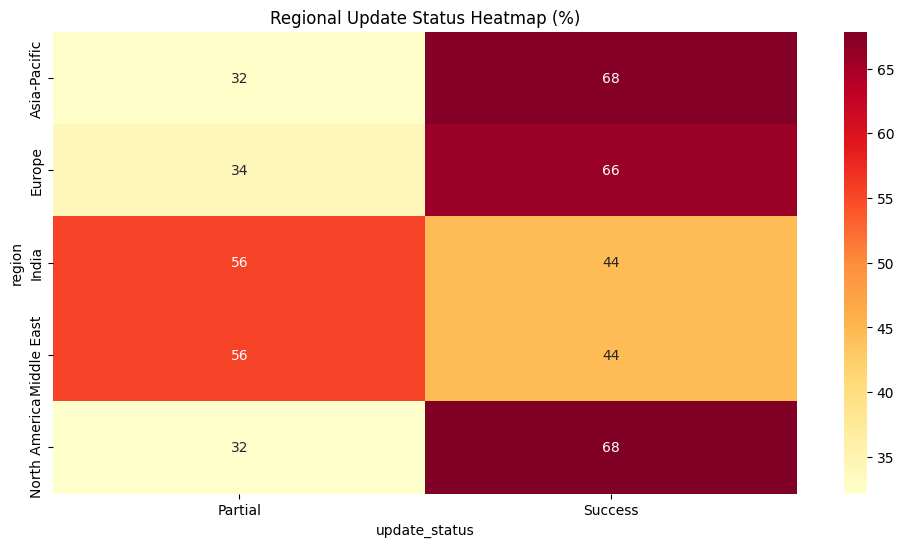

In [3]:
query = """
WITH RegionalStats AS (
    SELECT 
        region,
        update_status,
        COUNT(*) as count,
        SUM(COUNT(*)) OVER(PARTITION BY region) as total
    FROM ota_logs
    GROUP BY 1, 2
)
SELECT region, update_status, ROUND((count*1.0/total)*100, 2) as percentage
FROM RegionalStats
"""
stats_df = pd.read_sql_query(query, conn)
pivot_df = stats_df.pivot(index='region', columns='update_status', values='percentage')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlOrRd')
plt.title('Regional Update Status Heatmap (%)')
plt.show()